In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
pip install -i https://test.pypi.org/simple/ my_krml_25076922==2024.0.3.3

Looking in indexes: https://test.pypi.org/simple/
  Obtaining dependency information for my_krml_25076922==2024.0.3.3 from https://test-files.pythonhosted.org/packages/fe/04/fd57770b51acca4c13ac0c557c136a6cdf8223de23c3136b9b3aa347d63b/my_krml_25076922-2024.0.3.3-py3-none-any.whl.metadata
  Using cached https://test-files.pythonhosted.org/packages/fe/04/fd57770b51acca4c13ac0c557c136a6cdf8223de23c3136b9b3aa347d63b/my_krml_25076922-2024.0.3.3-py3-none-any.whl.metadata (1.3 kB)
Using cached https://test-files.pythonhosted.org/packages/fe/04/fd57770b51acca4c13ac0c557c136a6cdf8223de23c3136b9b3aa347d63b/my_krml_25076922-2024.0.3.3-py3-none-any.whl (9.9 kB)
  Attempting uninstall: my_krml_25076922
    Found existing installation: my_krml_25076922 2024.0.3.4
    Uninstalling my_krml_25076922-2024.0.3.4:
      Successfully uninstalled my_krml_25076922-2024.0.3.4
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

import os

/Users/vega7unk/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
path ='/Users/vega7unk/Documents/3rd_Sem_DSI/Adv_ML/AT2/Project/adv_mla_at2/data'

sales_data = pd.read_csv(f'{path}/df_forecast.csv')

In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47107050 entries, 0 to 47107049
Data columns (total 2 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   total_sales  float64
dtypes: float64(1), object(1)
memory usage: 718.8+ MB


In [6]:
np.float_ = np.float64

In [7]:
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Aggregate total sales across all stores and items for each day
daily_sales = sales_data.groupby('date').agg({'total_sales': 'sum'}).reset_index()

In [8]:
# Prepare the data for Prophet
# Prophet requires columns to be named 'ds' for the date and 'y' for the target
daily_sales = daily_sales.rename(columns={'date': 'ds', 'total_sales': 'y'})

In [9]:
# Split into training and testing (e.g., use the last 30 days for testing)
train_data = daily_sales[:-30]
test_data = daily_sales[-30:]

In [10]:
from prophet import Prophet

# Initialize and fit the Prophet model
model = Prophet()
model.fit(train_data)

13:54:04 - cmdstanpy - INFO - Chain [1] start processing
13:54:04 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
# Forecast the next 7 days
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

In [12]:
# Extract the predictions for the next 7 days
forecast_7_days = forecast[['ds', 'yhat']].tail(7)

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate the model on the test set
test_predictions = model.predict(test_data[['ds']])
test_rmse = np.sqrt(mean_squared_error(test_data['y'], test_predictions['yhat']))
test_mae = mean_absolute_error(test_data['y'], test_predictions['yhat'])

In [14]:
print(f'Test RMSE: {test_rmse:.4f}')
print(f'Test MAE: {test_mae:.4f}')

Test RMSE: 8808.8485
Test MAE: 6861.8635


In [15]:
# Display the forecasted sales for the next 7 days
print("Forecasted Sales for the Next 7 Days:")
print(forecast_7_days)

Forecasted Sales for the Next 7 Days:
             ds           yhat
1511 2015-03-20  111472.494338
1512 2015-03-21  131526.062360
1513 2015-03-22  133207.458998
1514 2015-03-23  108115.644866
1515 2015-03-24  100810.477066
1516 2015-03-25   99628.696276
1517 2015-03-26   99815.448539


In [17]:
from joblib import dump

dump(model, '/Users/vega7unk/Documents/3rd_Sem_DSI/Adv_ML/AT2/Project/adv_mla_at2/models/forecasting/forecasting_model.joblib')

['/Users/vega7unk/Documents/3rd_Sem_DSI/Adv_ML/AT2/Project/adv_mla_at2/models/forecasting/forecasting_model.joblib']

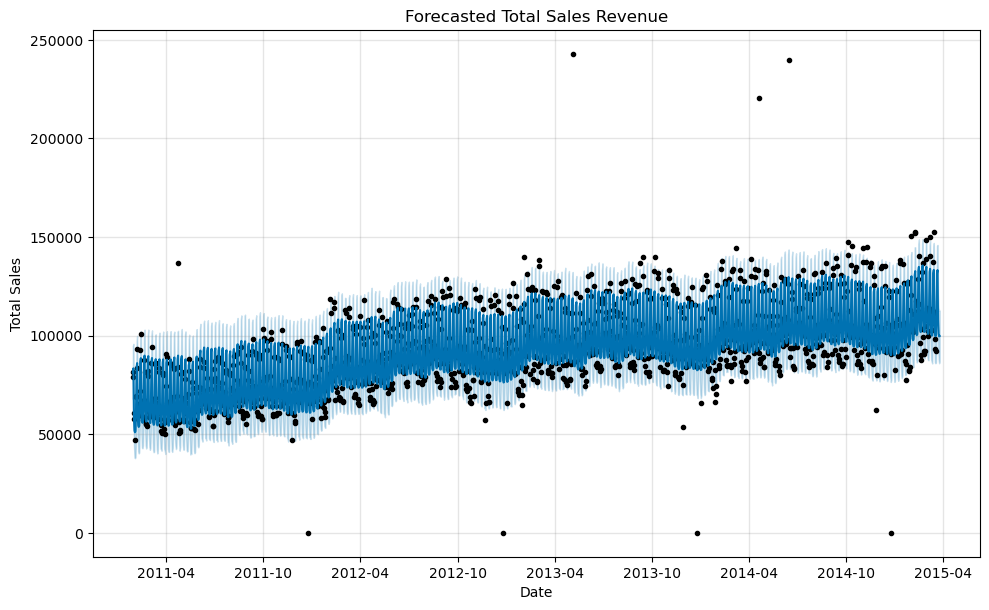

In [18]:
import matplotlib.pyplot as plt

# Plot the complete forecast (including historical data and the next 7 days)
fig = model.plot(forecast)
plt.title("Forecasted Total Sales Revenue")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


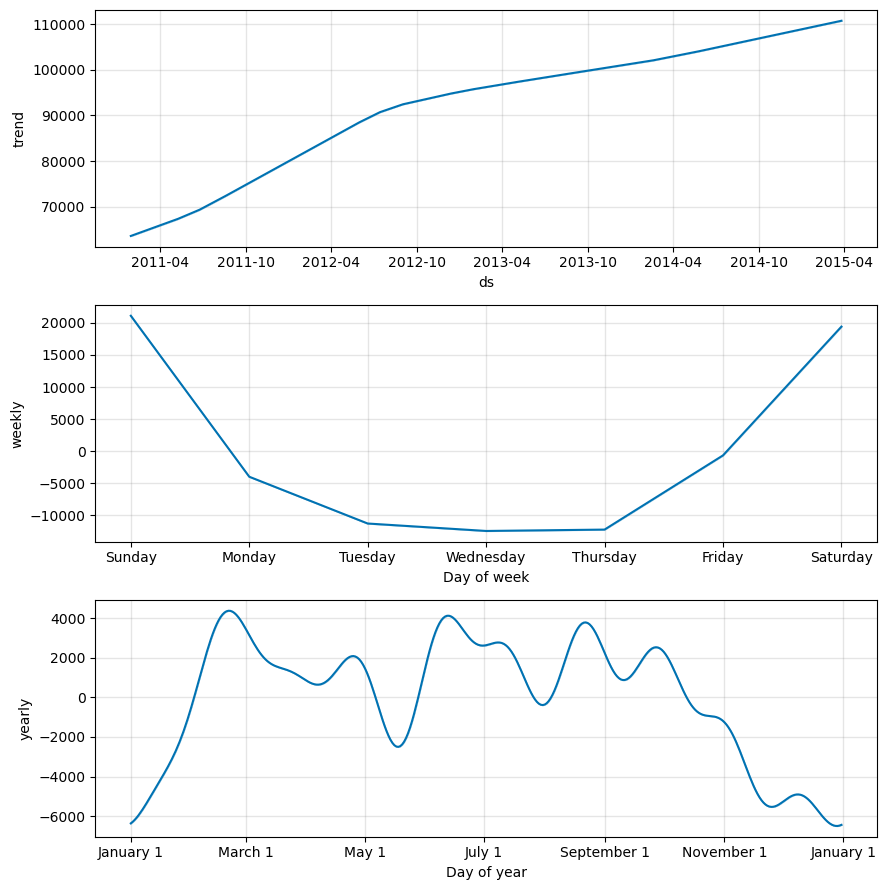

In [19]:
fig2 = model.plot_components(forecast)
plt.show()

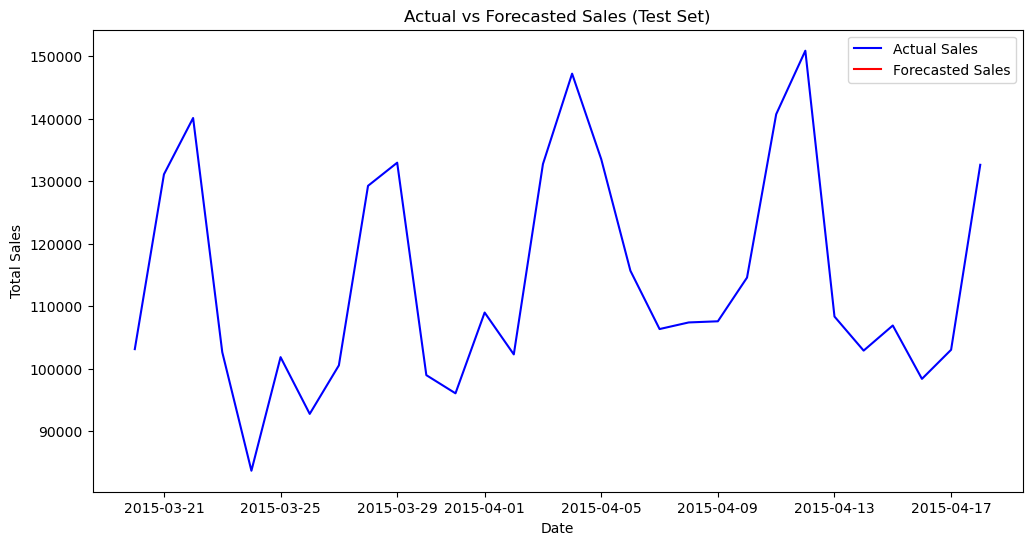

In [20]:
# Merge actual and forecasted values to visualize them together
test_data = test_data.copy()
test_data['forecasted'] = test_predictions['yhat']

# Plot the actual vs forecasted sales for the test set
plt.figure(figsize=(12, 6))
plt.plot(test_data['ds'], test_data['y'], label='Actual Sales', color='blue')
plt.plot(test_data['ds'], test_data['forecasted'], label='Forecasted Sales', color='red')
plt.title('Actual vs Forecasted Sales (Test Set)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

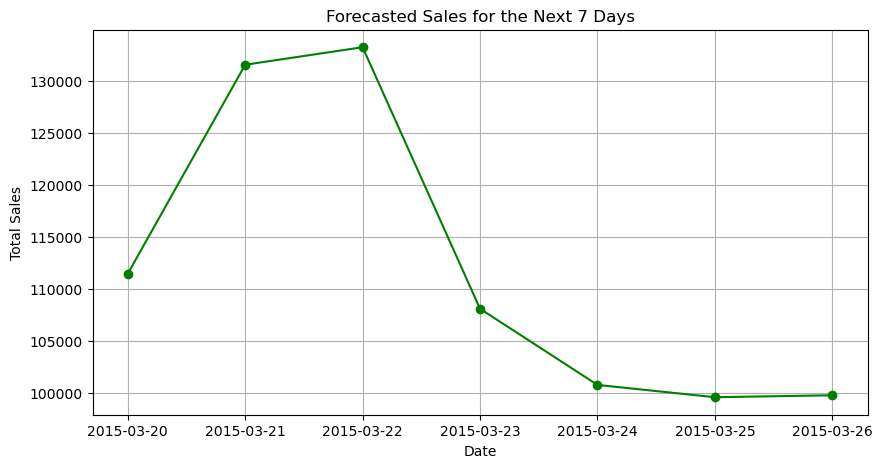

In [21]:
# Plot the forecasted sales for the next 7 days
plt.figure(figsize=(10, 5))
plt.plot(forecast_7_days['ds'], forecast_7_days['yhat'], marker='o', linestyle='-', color='green')
plt.title('Forecasted Sales for the Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()